In [1]:
from scipy import sparse

train = sparse.load_npz("3_dimentional_12.npz")
train

<14590x3 sparse matrix of type '<class 'numpy.float32'>'
	with 43770 stored elements in Compressed Sparse Row format>

In [2]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [3]:
X = train.toarray()
X

array([[  1.6214764,  13.91226  ,  28.309902 ],
       [ 33.37011  ,  22.321035 , -17.503767 ],
       [ 10.191434 ,  23.168783 ,  28.91403  ],
       ...,
       [-46.13875  ,   7.622175 ,  17.733727 ],
       [ 28.368454 ,  20.677889 ,  12.779148 ],
       [  3.667169 ,   1.901606 ,  -8.99217  ]], dtype=float32)

In [4]:
import matplotlib.pyplot as plt

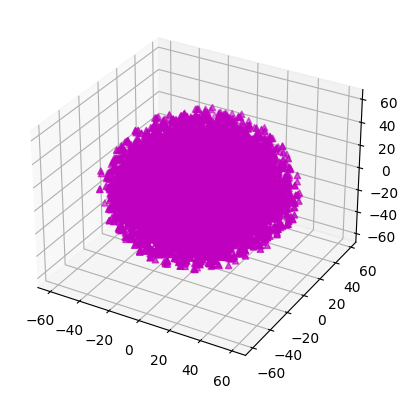

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='^', c="m")
plt.show()

IndexError: index 3 is out of bounds for axis 1 with size 3

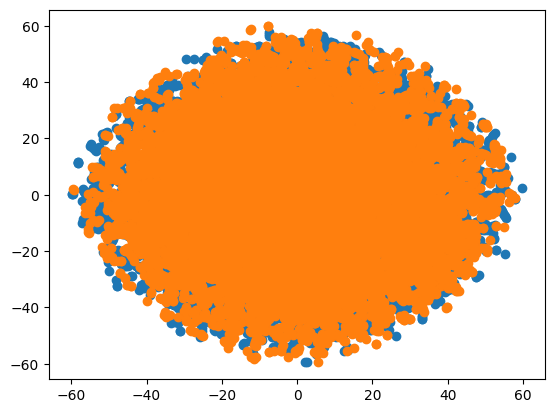

In [40]:
agg_clustering = AgglomerativeClustering(n_clusters=12)

In [41]:
cluster_labels = agg_clustering.fit_predict(X)

In [42]:
df_describe = pd.DataFrame(cluster_labels)
df_describe.describe()

,0
count,14590.000000
mean,4.726388
std,3.422514
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,11.000000


In [43]:
submission = np.arange(len(cluster_labels)).reshape(-1, 1)
submission = np.concatenate((submission, cluster_labels.reshape(-1, 1)), axis=1)

In [44]:
np.savetxt("submission_agglomerative_3d_12.csv", submission, delimiter=",", header="ID,TARGET", comments="", fmt='%d')
